In [46]:
import ETFFundamentalData as finData
import ETFHistoryDownload as hist
import sqlalchemy as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
eft_data_connection_string2 = 'sqlite:///./Resources/etf.db'
# Database engine
etf_data_engine2 = sql.create_engine(eft_data_connection_string2, echo=True)

In [47]:
#read price History

sql_query = """
SELECT date, close
FROM STOCK_HISTORY where symbol = 'AMZN' and date > '2020-01-01'
"""
price_df = pd.read_sql_query(sql_query, eft_data_connection_string2)
price_df = price_df.sort_values(by=['date'])
price_df = price_df.set_index('date')
#price_df['close'] = price_df['close'].rolling(30).mean()
price_df = price_df.dropna()
display(price_df)

,close
date,
2020-01-02,1897.71
2020-01-03,1874.93
2020-01-06,1903.33
2020-01-07,1906.86
2020-01-08,1892.09
...,...
2021-11-03,3384.00
2021-11-04,3477.04
2021-11-05,3516.64


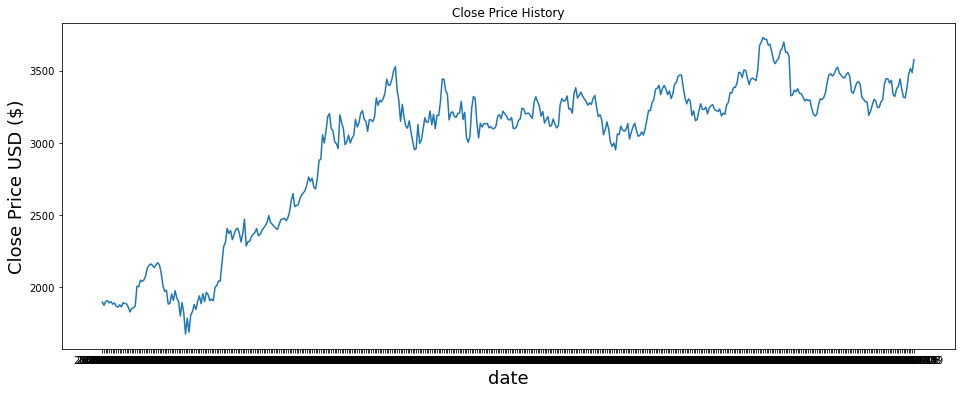

In [48]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(price_df['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# Convert the dataframe to a numpy array
price_dataset = price_df.values
training_data_len = int(np.ceil(len(price_dataset)*.95))
display(training_data_len)

446

In [50]:
# Scaling data set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_dataset)
scaled_data

array([[0.10777487],
       [0.09669085],
       [0.11050939],
       [0.11222697],
       [0.10504036],
       [0.10937568],
       [0.10060772],
       [0.10470949],
       [0.09390281],
       [0.09040439],
       [0.09816029],
       [0.09171812],
       [0.10526418],
       [0.10278755],
       [0.10138623],
       [0.09022436],
       [0.07428925],
       [0.08618097],
       [0.08845325],
       [0.09472492],
       [0.16131685],
       [0.15912729],
       [0.18176731],
       [0.17682378],
       [0.18205439],
       [0.19608702],
       [0.22301371],
       [0.2316357 ],
       [0.23604887],
       [0.23107614],
       [0.22346622],
       [0.23329003],
       [0.24036473],
       [0.23227797],
       [0.2042419 ],
       [0.16179855],
       [0.14326517],
       [0.14762482],
       [0.10055907],
       [0.10362445],
       [0.1351638 ],
       [0.11320984],
       [0.14609213],
       [0.12058135],
       [0.1094438 ],
       [0.06023715],
       [0.10596971],
       [0.069

In [51]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10777487, 0.09669085, 0.11050939, 0.11222697, 0.10504036,
       0.10937568, 0.10060772, 0.10470949, 0.09390281, 0.09040439,
       0.09816029, 0.09171812, 0.10526418, 0.10278755, 0.10138623,
       0.09022436, 0.07428925, 0.08618097, 0.08845325, 0.09472492,
       0.16131685, 0.15912729, 0.18176731, 0.17682378, 0.18205439,
       0.19608702, 0.22301371, 0.2316357 , 0.23604887, 0.23107614,
       0.22346622, 0.23329003, 0.24036473, 0.23227797, 0.2042419 ,
       0.16179855, 0.14326517, 0.14762482, 0.10055907, 0.10362445,
       0.1351638 , 0.11320984, 0.14609213, 0.12058135, 0.1094438 ,
       0.06023715, 0.10596971, 0.06978362, 0.        , 0.05357117,
       0.00573664, 0.06382316, 0.07599223, 0.09940103, 0.08265822,
       0.110125  , 0.12835185, 0.10197011, 0.13575985, 0.10885019])]
[0.1404090092983199]

[array([0.10777487, 0.09669085, 0.11050939, 0.11222697, 0.10504036,
       0.10937568, 0.10060772, 0.10470949, 0.09390281, 0.09040439,
       0.09816029, 0.09171812, 0.105

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=1)

39/39 [==============================] - 5s 51ms/step - loss: 0.0340: 0s - loss:


In [53]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = price_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
display(rmse)

mape = np.mean(np.abs((y_test-predictions) / predictions))*100
display(mape)

81.6560125960791

2.048180512310864

C:\programdata\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


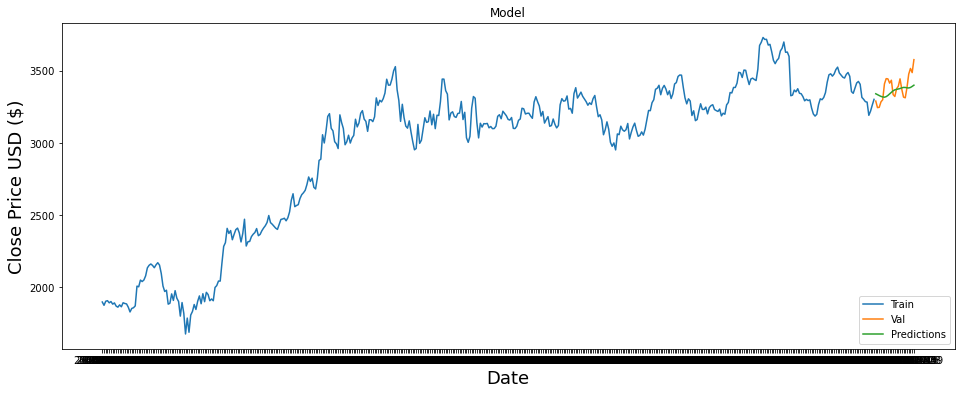

In [54]:
# Plot the data
train = price_df[:training_data_len]
valid = price_df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
valid

,close,Predictions
date,,
2021-10-08,3290.570,3341.189697
2021-10-11,3245.150,3335.003662
2021-10-12,3247.330,3328.778076
2021-10-13,3285.000,3323.020996
2021-10-14,3299.880,3319.268799
2021-10-15,3409.230,3317.477783
2021-10-18,3446.010,3321.224365
2021-10-19,3444.470,3329.544678
2021-10-20,3414.830,3340.299561


In [59]:
price_df
price_df['date'] = price_df.index
price_df.reset_index(drop=True, inplace=True)
price_df

,close,date
0,1897.71,0
1,1874.93,1
2,1903.33,2
3,1906.86,3
4,1892.09,4
...,...,...
464,3384.00,464
465,3477.04,465
466,3516.64,466
467,3487.89,467


Predict Stock Prices in Python using k-Nearest Neighbors: Simplified 

In [32]:
from fbprophet import Prophet

new_price_df = [price_df['close']]
#new_price_df.columns["ds","y"]
new_price_df

[date
 2020-01-02    1897.71
 2020-01-03    1874.93
 2020-01-06    1903.33
 2020-01-07    1906.86
 2020-01-08    1892.09
                ...   
 2021-11-03    3384.00
 2021-11-04    3477.04
 2021-11-05    3516.64
 2021-11-08    3487.89
 2021-11-09    3577.65
 Name: close, Length: 469, dtype: float64]

In [33]:
from statsmodels.base.transform import BoxCox

In [35]:
bc= BoxCox()
price_df["close"], lmbda =bc.transform_boxcox(price_df["close"])

In [45]:
price_df = price_df. .reset_index(drop=True, inplace=True)
price_df[date2] = price_df.index
price_df
#data['date']
#data.columns = ['y']
#data
#df.reset_index(drop=True, inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

,close
date,
2020-01-02,332.220869
2020-01-03,329.302626
2020-01-06,332.939351
2020-01-07,333.390344
2020-01-08,331.501807
...,...
2021-11-03,506.763364
2021-11-04,516.890213
2021-11-05,521.177972
